6am to 6pm RT 50 MF 
---

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import requests
import json
import geopandas as gpd

API Access
----

In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

In [4]:
def concat_frames_columns(geo_response, response, date_range, time_range='6am-9am', days='m-f', in_or_out='inbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['times'] = time_range
    full_df['days_of_week'] = days
    full_df['direction'] = in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    full_df['proportion_of_segments'] = full_df['countForSegment']/full_df['max_seg_count']
    
    return full_df

Start of M-F, 6pm-12am Overnight, inbound df, sorted by 30 day chunks Jan 25-July26
---

In [5]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '01-25-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '01-25-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '23:59',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

over_in_jantofeb = concat_frames_columns(requests.get(URL, params = params, headers = headers),
                                     requests.get(URL, params = params1, headers = headers), "1/25/22-2/24/22")

#over_in_jantofeb = over_in_jantofeb.loc[over_in_jantofeb['countForSegment'] > over_in_jantofeb['countForSegment'].max()/2]

over_in_jantofeb

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.252511,10.821257,10.935,3.201,...,1.544,1.031,262,1.620,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.932384
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.876065,12.529950,7.338,2.317,...,1.407,1.135,260,1.488,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.925267
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.571579,9.601494,11.617,3.501,...,1.768,1.409,278,1.898,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.989324
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.695508,9.099212,14.507,4.033,...,1.705,1.488,264,1.885,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.939502
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.664585,5.237979,62.613,7.970,...,2.438,1.827,246,2.934,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.875445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.254232,10.940311,5.006,3.109,...,1.724,1.315,259,1.845,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.921708
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.925380,12.548692,13.643,2.401,...,1.415,1.219,271,1.510,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.964413
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,6.943955,3.495126,84.131,18.424,...,1.681,1.412,264,1.825,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.939502
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,4.078297,5.827432,10.161,6.404,...,2.403,1.234,263,2.623,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.935943


In [6]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '02-25-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '23:59',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

over_in_febtomar = concat_frames_columns(requests.get(URL, params = params, headers = headers),
                                     requests.get(URL, params = params1, headers = headers), "2/25/22-3/26/22")

#over_in_jantofeb = over_in_jantofeb.loc[over_in_jantofeb['countForSegment'] > over_in_jantofeb['countForSegment'].max()/2]

over_in_febtomar

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.455784,9.925547,10.188,4.784,...,1.485,1.301,190,1.633,2/25/22-3/26/22,6am-9am,m-f,inbound,205,0.926829
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.906731,12.328430,7.262,2.135,...,1.399,1.200,186,1.499,2/25/22-3/26/22,6am-9am,m-f,inbound,205,0.907317
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.669675,9.248691,9.572,3.685,...,1.806,1.324,203,1.951,2/25/22-3/26/22,6am-9am,m-f,inbound,205,0.990244
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.739542,8.952956,5.768,4.221,...,1.765,1.316,192,1.900,2/25/22-3/26/22,6am-9am,m-f,inbound,205,0.936585
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.766184,5.126323,68.849,7.664,...,2.572,1.864,179,2.894,2/25/22-3/26/22,6am-9am,m-f,inbound,205,0.873171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.316672,10.645443,5.805,3.031,...,1.737,1.399,192,1.879,2/25/22-3/26/22,6am-9am,m-f,inbound,205,0.936585
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.868278,12.932230,6.054,2.319,...,1.403,1.192,198,1.536,2/25/22-3/26/22,6am-9am,m-f,inbound,205,0.965854
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,9.236224,2.627697,181.242,19.866,...,1.693,1.402,192,1.888,2/25/22-3/26/22,6am-9am,m-f,inbound,205,0.936585
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,4.391479,5.411844,20.435,6.804,...,2.388,1.458,192,2.837,2/25/22-3/26/22,6am-9am,m-f,inbound,205,0.936585


In [7]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '03-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '23:59',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

over_in_martoapr = concat_frames_columns(requests.get(URL, params = params, headers = headers),
                                     requests.get(URL, params = params1, headers = headers), "3/27/22-4/26/22")

#over_in_jantofeb = over_in_jantofeb.loc[over_in_jantofeb['countForSegment'] > over_in_jantofeb['countForSegment'].max()/2]

over_in_martoapr

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.612627,9.329690,11.134,4.676,...,1.552,0.841,249,1.673,3/27/22-4/26/22,6am-9am,m-f,inbound,269,0.925651
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,2.160418,10.880765,16.414,2.847,...,1.524,1.362,249,1.633,3/27/22-4/26/22,6am-9am,m-f,inbound,269,0.925651
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.769203,8.916284,11.157,3.617,...,1.953,1.365,261,2.154,3/27/22-4/26/22,6am-9am,m-f,inbound,269,0.970260
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.826148,8.678597,11.166,3.964,...,1.904,1.374,250,2.056,3/27/22-4/26/22,6am-9am,m-f,inbound,269,0.929368
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.948226,4.937729,13.348,8.450,...,2.676,1.887,252,3.231,3/27/22-4/26/22,6am-9am,m-f,inbound,269,0.936803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.499653,9.866169,32.930,3.331,...,1.833,1.220,251,1.946,3/27/22-4/26/22,6am-9am,m-f,inbound,269,0.933086
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,2.020438,11.958298,5.838,2.628,...,1.493,1.316,265,1.665,3/27/22-4/26/22,6am-9am,m-f,inbound,269,0.985130
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,8.164454,2.972642,121.167,19.286,...,1.905,1.452,249,2.119,3/27/22-4/26/22,6am-9am,m-f,inbound,269,0.925651
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,4.798760,4.952529,11.623,7.612,...,2.614,1.836,250,3.048,3/27/22-4/26/22,6am-9am,m-f,inbound,269,0.929368


In [8]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '04-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '23:59',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

over_in_aprtomay = concat_frames_columns(requests.get(URL, params = params, headers = headers),
                                     requests.get(URL, params = params1, headers = headers), "4/27/22-5/25/22")

#over_in_jantofeb = over_in_jantofeb.loc[over_in_jantofeb['countForSegment'] > over_in_jantofeb['countForSegment'].max()/2]

over_in_aprtomay

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,3.547629,6.870786,281.933,4.906,...,1.483,0.813,267,1.606,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.943463
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,2.704745,8.691023,168.273,2.939,...,1.470,1.117,267,1.572,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.943463
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.719066,9.080692,30.629,3.456,...,1.894,1.494,274,2.101,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.968198
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.813219,8.718482,14.375,4.027,...,1.852,1.299,269,1.997,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.950530
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.832593,5.055878,11.003,8.465,...,2.659,1.937,270,3.049,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.954064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.415467,10.210034,19.184,3.256,...,1.747,1.485,270,1.892,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.954064
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.959982,12.327154,6.752,2.504,...,1.477,1.153,280,1.587,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.989399
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,11.297746,2.148216,258.473,28.639,...,1.841,1.484,268,2.037,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.946996
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,4.723743,5.031180,66.682,7.471,...,2.494,1.717,269,2.917,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.950530


In [9]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '05-26-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '05-26-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '23:59',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

over_in_maytojun = concat_frames_columns(requests.get(URL, params = params, headers = headers),
                                     requests.get(URL, params = params1, headers = headers), "5/26/22-6/25/22")

#over_in_jantofeb = over_in_jantofeb.loc[over_in_jantofeb['countForSegment'] > over_in_jantofeb['countForSegment'].max()/2]

over_in_maytojun

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.374085,10.267113,8.134,4.136,...,1.552,0.948,272,1.653,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.954386
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,2.008157,11.705758,7.637,2.490,...,1.456,1.300,268,1.530,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.940351
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.626406,9.401060,15.360,3.313,...,1.809,1.055,281,1.946,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.985965
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.941218,8.339062,58.055,4.070,...,1.743,1.153,271,1.948,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.950877
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.659465,5.243735,17.577,8.173,...,2.679,1.702,271,2.904,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.950877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.209504,11.161781,4.203,2.824,...,1.732,0.883,270,1.872,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.947368
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,2.029928,11.902393,20.701,2.553,...,1.460,1.117,278,1.555,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.975439
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,8.558140,2.835897,253.734,20.105,...,1.831,1.448,272,1.979,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.954386
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,5.770007,4.118886,284.311,7.082,...,2.467,1.480,272,2.834,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.954386


In [10]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '1',
    'startDate': '06-26-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '1',
    'startDate': '06-26-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '23:59',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

over_in_juntojul = concat_frames_columns(requests.get(URL, params = params, headers = headers),
                                     requests.get(URL, params = params1, headers = headers), "6/26/22-7/26/22")

#over_in_jantofeb = over_in_jantofeb.loc[over_in_jantofeb['countForSegment'] > over_in_jantofeb['countForSegment'].max()/2]

over_in_juntojul

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.291579,10.636771,8.662,3.842,...,1.495,0.733,271,1.601,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.960993
1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,2.767756,8.493162,229.346,2.413,...,1.431,1.049,266,1.510,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.943262
2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.463457,10.022907,17.664,3.307,...,1.683,0.904,278,1.834,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.985816
3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.854773,8.591576,16.760,4.140,...,1.797,1.292,273,1.967,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.968085
4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.625706,5.282005,12.273,7.601,...,2.677,1.245,269,3.041,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.953901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.429097,10.152744,12.789,3.302,...,1.768,1.433,269,1.858,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.953901
562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.915051,12.616374,5.269,2.298,...,1.485,1.075,277,1.616,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.982270
563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,8.154800,2.976161,82.527,21.012,...,1.838,0.825,270,2.019,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.957447
564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,4.754278,4.998866,61.330,7.208,...,2.385,1.480,273,2.833,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.968085


Start of M-F, 6pm-12am Overnight, outbound df, sorted by 30 day chunks Jan 25-July26
---

In [11]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '0',
    'startDate': '01-25-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '0',
    'startDate': '01-25-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '02-24-2022',
    'endTime' : '23:59',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

over_out_jantofeb = concat_frames_columns(requests.get(URL, params = params, headers = headers),
                                     requests.get(URL, params = params1, headers = headers), "1/25/22-2/24/22")

#over_out_jantofeb = over_out_jantofeb.loc[over_out_jantofeb['countForSegment'] > over_out_jantofeb['countForSegment'].max()/2]

over_out_jantofeb

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.90526 36.13135, -86.90525 36.1...",CXODVDSN,Davidson Station Outbound,WALMARTC,Walmart,24.970,3.219242,7.756484,18.066,4.195,...,2.419,1.071,335,2.557,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.642994
1,"LINESTRING (-86.84755 36.15202, -86.84783 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.150984,11.532396,25.435,2.897,...,1.525,1.059,309,1.643,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.593090
2,"LINESTRING (-86.87267 36.14453, -86.87286 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,3.806041,6.561937,12.429,5.167,...,2.684,2.107,290,2.871,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.556622
3,"LINESTRING (-86.79158 36.16174, -86.79182 36.1...",CXONGULC,11th Ave / N Gulch Station Outbound,CXO17AVE,17th Ave Station Outbound,24.726,2.687031,9.201978,23.483,3.511,...,1.828,1.546,292,1.996,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.560461
4,"LINESTRING (-86.87872 36.14531, -86.87893 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,2.143457,11.651738,4.377,2.503,...,1.816,1.312,293,1.900,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.562380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,"LINESTRING (-86.82778 36.15276, -86.82806 36.1...",CHA33AWF,Charlotte Ave & 33rd Ave Wb,CXOSYLHE,37th Ave/Sylvan Heights Station Outbound,24.596,2.494126,9.861571,41.788,3.963,...,1.396,1.117,293,1.485,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.562380
577,"LINESTRING (-86.88066 36.13905, -86.88084 36.1...",ANNPREEF,Annex Ave & Premier Dr Eb,CXOANNEX,Annex Station Outbound,23.249,5.427535,4.283528,17.680,9.380,...,2.388,1.771,314,2.798,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.602687
578,"LINESTRING (-86.84258 36.15221, -86.84286 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.343707,10.584088,5.451,3.418,...,1.658,1.220,307,1.746,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.589251
579,"LINESTRING (-86.85166 36.15175, -86.85192 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.849644,8.704947,20.157,4.366,...,1.652,1.318,309,1.779,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.593090


In [12]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '0',
    'startDate': '02-25-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '0',
    'startDate': '02-25-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '03-26-2022',
    'endTime' : '23:59',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

over_out_febtomar = concat_frames_columns(requests.get(URL, params = params, headers = headers),
                                     requests.get(URL, params = params1, headers = headers), "2/25/22-3/26/22")

#over_out_jantofeb = over_out_jantofeb.loc[over_out_jantofeb['countForSegment'] > over_out_jantofeb['countForSegment'].max()/2]

over_out_febtomar

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.90526 36.13135, -86.90525 36.1...",CXODVDSN,Davidson Station Outbound,WALMARTC,Walmart,24.970,3.198051,7.807880,7.540,4.394,...,2.486,1.189,234,2.589,2/25/22-3/26/22,6am-9am,m-f,inbound,261,0.896552
1,"LINESTRING (-86.84755 36.15202, -86.84783 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.110937,11.751180,8.046,2.622,...,1.518,1.298,222,1.685,2/25/22-3/26/22,6am-9am,m-f,inbound,261,0.850575
2,"LINESTRING (-86.87267 36.14453, -86.87286 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,4.453219,5.608303,51.217,5.793,...,2.723,1.907,215,3.030,2/25/22-3/26/22,6am-9am,m-f,inbound,261,0.823755
3,"LINESTRING (-86.79158 36.16174, -86.79182 36.1...",CXONGULC,11th Ave / N Gulch Station Outbound,CXO17AVE,17th Ave Station Outbound,24.726,2.755692,8.972701,21.007,3.939,...,1.851,1.375,211,2.057,2/25/22-3/26/22,6am-9am,m-f,inbound,261,0.808429
4,"LINESTRING (-86.87872 36.14531, -86.87893 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,2.194597,11.380222,6.515,2.584,...,1.761,1.493,216,1.914,2/25/22-3/26/22,6am-9am,m-f,inbound,261,0.827586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,"LINESTRING (-86.82778 36.15276, -86.82806 36.1...",CHA33AWF,Charlotte Ave & 33rd Ave Wb,CXOSYLHE,37th Ave/Sylvan Heights Station Outbound,24.596,2.305098,10.670262,15.746,3.552,...,1.353,1.207,214,1.476,2/25/22-3/26/22,6am-9am,m-f,inbound,261,0.819923
577,"LINESTRING (-86.88066 36.13905, -86.88084 36.1...",ANNPREEF,Annex Ave & Premier Dr Eb,CXOANNEX,Annex Station Outbound,23.249,5.850670,3.973733,18.929,9.870,...,2.380,0.623,230,2.833,2/25/22-3/26/22,6am-9am,m-f,inbound,261,0.881226
578,"LINESTRING (-86.84258 36.15221, -86.84286 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.809385,8.829690,39.102,4.091,...,1.733,1.002,221,1.898,2/25/22-3/26/22,6am-9am,m-f,inbound,261,0.846743
579,"LINESTRING (-86.85166 36.15175, -86.85192 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,3.099973,8.002005,32.719,4.645,...,1.725,1.374,222,1.860,2/25/22-3/26/22,6am-9am,m-f,inbound,261,0.850575


In [13]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '0',
    'startDate': '03-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '0',
    'startDate': '03-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '04-26-2022',
    'endTime' : '23:59',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

over_out_martoapr = concat_frames_columns(requests.get(URL, params = params, headers = headers),
                                     requests.get(URL, params = params1, headers = headers), "3/27/22-4/26/22")

#over_out_jantofeb = over_out_jantofeb.loc[over_out_jantofeb['countForSegment'] > over_out_jantofeb['countForSegment'].max()/2]

over_out_martoapr

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.90526 36.13135, -86.90525 36.1...",CXODVDSN,Davidson Station Outbound,WALMARTC,Walmart,24.970,3.310719,7.542168,5.439,4.486,...,2.466,1.435,299,2.625,3/27/22-4/26/22,6am-9am,m-f,inbound,300,0.996667
1,"LINESTRING (-86.84755 36.15202, -86.84783 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.342351,10.590215,8.037,3.420,...,1.656,0.509,282,1.824,3/27/22-4/26/22,6am-9am,m-f,inbound,300,0.940000
2,"LINESTRING (-86.87267 36.14453, -86.87286 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,4.522944,5.521846,26.227,6.578,...,2.985,2.346,287,3.326,3/27/22-4/26/22,6am-9am,m-f,inbound,300,0.956667
3,"LINESTRING (-86.87872 36.14531, -86.87893 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,2.264483,11.029008,4.742,2.622,...,1.819,1.498,290,2.006,3/27/22-4/26/22,6am-9am,m-f,inbound,300,0.966667
4,"LINESTRING (-86.79158 36.16174, -86.79182 36.1...",CXONGULC,11th Ave / N Gulch Station Outbound,CXO17AVE,17th Ave Station Outbound,24.726,2.831800,8.731549,7.121,3.828,...,2.105,1.558,275,2.290,3/27/22-4/26/22,6am-9am,m-f,inbound,300,0.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,"LINESTRING (-86.82778 36.15276, -86.82806 36.1...",CHA33AWF,Charlotte Ave & 33rd Ave Wb,CXOSYLHE,37th Ave/Sylvan Heights Station Outbound,24.596,2.870654,8.568082,30.593,4.722,...,1.461,0.778,269,1.593,3/27/22-4/26/22,6am-9am,m-f,inbound,300,0.896667
577,"LINESTRING (-86.88066 36.13905, -86.88084 36.1...",ANNPREEF,Annex Ave & Premier Dr Eb,CXOANNEX,Annex Station Outbound,23.249,5.750207,4.043159,16.145,9.530,...,2.552,1.993,295,3.012,3/27/22-4/26/22,6am-9am,m-f,inbound,300,0.983333
578,"LINESTRING (-86.84258 36.15221, -86.84286 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.747518,9.028512,12.835,3.880,...,1.932,1.320,278,2.091,3/27/22-4/26/22,6am-9am,m-f,inbound,300,0.926667
579,"LINESTRING (-86.85166 36.15175, -86.85192 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,3.796599,6.533742,29.526,5.621,...,1.914,1.103,282,2.066,3/27/22-4/26/22,6am-9am,m-f,inbound,300,0.940000


In [14]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '0',
    'startDate': '04-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '0',
    'startDate': '04-27-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '05-25-2022',
    'endTime' : '23:59',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

over_out_aprtomay = concat_frames_columns(requests.get(URL, params = params, headers = headers),
                                     requests.get(URL, params = params1, headers = headers), "4/27/22-5/25/22")

#over_out_jantofeb = over_out_jantofeb.loc[over_out_jantofeb['countForSegment'] > over_out_jantofeb['countForSegment'].max()/2]

over_out_aprtomay

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.90526 36.13135, -86.90525 36.1...",CXODVDSN,Davidson Station Outbound,WALMARTC,Walmart,24.970,3.262204,7.654334,6.823,4.396,...,2.513,2.241,313,2.644,4/27/22-5/25/22,6am-9am,m-f,inbound,314,0.996815
1,"LINESTRING (-86.84755 36.15202, -86.84783 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.508746,9.887808,16.898,3.722,...,1.657,1.298,291,1.824,4/27/22-5/25/22,6am-9am,m-f,inbound,314,0.926752
2,"LINESTRING (-86.87267 36.14453, -86.87286 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,4.396721,5.680370,13.679,6.004,...,3.115,2.270,298,3.414,4/27/22-5/25/22,6am-9am,m-f,inbound,314,0.949045
3,"LINESTRING (-86.79158 36.16174, -86.79182 36.1...",CXONGULC,11th Ave / N Gulch Station Outbound,CXO17AVE,17th Ave Station Outbound,24.726,2.854388,8.662452,6.014,4.011,...,2.075,1.475,289,2.226,4/27/22-5/25/22,6am-9am,m-f,inbound,314,0.920382
4,"LINESTRING (-86.87872 36.14531, -86.87893 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,2.288735,10.912141,4.664,2.735,...,1.884,1.445,298,1.960,4/27/22-5/25/22,6am-9am,m-f,inbound,314,0.949045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,"LINESTRING (-86.82778 36.15276, -86.82806 36.1...",CHA33AWF,Charlotte Ave & 33rd Ave Wb,CXOSYLHE,37th Ave/Sylvan Heights Station Outbound,24.596,3.019728,8.145104,32.348,5.719,...,1.457,1.144,287,1.577,4/27/22-5/25/22,6am-9am,m-f,inbound,314,0.914013
577,"LINESTRING (-86.88066 36.13905, -86.88084 36.1...",ANNPREEF,Annex Ave & Premier Dr Eb,CXOANNEX,Annex Station Outbound,23.249,5.834653,3.984641,20.841,9.848,...,2.653,0.742,303,3.019,4/27/22-5/25/22,6am-9am,m-f,inbound,314,0.964968
578,"LINESTRING (-86.84258 36.15221, -86.84286 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.707826,9.160855,14.375,3.978,...,1.879,1.388,293,2.047,4/27/22-5/25/22,6am-9am,m-f,inbound,314,0.933121
579,"LINESTRING (-86.85166 36.15175, -86.85192 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,4.033079,6.150636,33.289,6.411,...,1.938,1.579,292,2.091,4/27/22-5/25/22,6am-9am,m-f,inbound,314,0.929936


In [15]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '0',
    'startDate': '05-26-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '0',
    'startDate': '05-26-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '06-25-2022',
    'endTime' : '23:59',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

over_out_maytojun = concat_frames_columns(requests.get(URL, params = params, headers = headers),
                                     requests.get(URL, params = params1, headers = headers), "5/26/22-6/25/22")

#over_out_jantofeb = over_out_jantofeb.loc[over_out_jantofeb['countForSegment'] > over_out_jantofeb['countForSegment'].max()/2]

over_out_maytojun

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.90526 36.13135, -86.90525 36.1...",CXODVDSN,Davidson Station Outbound,WALMARTC,Walmart,24.970,3.230280,7.729980,5.838,4.416,...,2.496,0.801,311,2.618,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.987302
1,"LINESTRING (-86.84755 36.15202, -86.84783 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.262589,10.963547,13.802,3.073,...,1.600,1.302,292,1.730,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.926984
2,"LINESTRING (-86.87267 36.14453, -86.87286 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,4.371814,5.712732,13.058,6.246,...,3.007,1.872,295,3.268,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.936508
3,"LINESTRING (-86.87872 36.14531, -86.87893 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,2.534186,9.855236,4.998,3.600,...,1.929,1.564,295,2.048,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.936508
4,"LINESTRING (-86.79158 36.16174, -86.79182 36.1...",CXONGULC,11th Ave / N Gulch Station Outbound,CXO17AVE,17th Ave Station Outbound,24.726,2.935849,8.422095,24.196,3.927,...,2.126,1.607,292,2.286,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.926984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,"LINESTRING (-86.82778 36.15276, -86.82806 36.1...",CHA33AWF,Charlotte Ave & 33rd Ave Wb,CXOSYLHE,37th Ave/Sylvan Heights Station Outbound,24.596,3.036617,8.099803,21.581,6.500,...,1.423,1.150,290,1.507,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.920635
576,"LINESTRING (-86.88066 36.13905, -86.88084 36.1...",ANNPREEF,Annex Ave & Premier Dr Eb,CXOANNEX,Annex Station Outbound,23.249,5.517500,4.213684,19.635,9.215,...,2.458,1.735,302,2.931,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.958730
577,"LINESTRING (-86.84258 36.15221, -86.84286 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.633545,9.419243,17.719,3.944,...,1.857,1.078,292,1.980,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.926984
578,"LINESTRING (-86.85166 36.15175, -86.85192 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,3.707249,6.691215,34.794,4.997,...,1.796,1.397,289,1.971,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.917460


In [16]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/50'

params = {
    'direction': '0',
    'startDate': '06-26-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '23:59',
    'format' : 'geojson',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

params1 = {
    'direction': '0',
    'startDate': '06-26-2022',
    'beginTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'endDate' : '07-26-2022',
    'endTime' : '23:59',
    'excludeDates': '01-17-2022,02-18-2022,03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022,04-14-2022,04-15-2022,05-30-2022,07-04-2022',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

over_out_juntojul = concat_frames_columns(requests.get(URL, params = params, headers = headers),
                                     requests.get(URL, params = params1, headers = headers), "6/26/22-7/26/22")

#over_out_jantofeb = over_out_jantofeb.loc[over_out_jantofeb['countForSegment'] > over_out_jantofeb['countForSegment'].max()/2]

over_out_juntojul

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.90526 36.13135, -86.90525 36.1...",CXODVDSN,Davidson Station Outbound,WALMARTC,Walmart,24.970,3.314702,7.533106,5.704,4.392,...,2.526,2.247,305,2.697,6/26/22-7/26/22,6am-9am,m-f,inbound,311,0.980707
1,"LINESTRING (-86.84755 36.15202, -86.84783 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.304331,10.764947,8.869,3.506,...,1.579,1.099,290,1.726,6/26/22-7/26/22,6am-9am,m-f,inbound,311,0.932476
2,"LINESTRING (-86.87267 36.14453, -86.87286 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,4.594580,5.435753,32.678,6.630,...,3.050,2.084,293,3.405,6/26/22-7/26/22,6am-9am,m-f,inbound,311,0.942122
3,"LINESTRING (-86.87872 36.14531, -86.87893 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,2.322020,10.755721,7.299,2.692,...,1.890,1.521,294,2.009,6/26/22-7/26/22,6am-9am,m-f,inbound,311,0.945338
4,"LINESTRING (-86.79158 36.16174, -86.79182 36.1...",CXONGULC,11th Ave / N Gulch Station Outbound,CXO17AVE,17th Ave Station Outbound,24.726,2.872873,8.606715,7.425,4.036,...,2.060,1.430,292,2.218,6/26/22-7/26/22,6am-9am,m-f,inbound,311,0.938907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,"LINESTRING (-86.82778 36.15276, -86.82806 36.1...",CHA33AWF,Charlotte Ave & 33rd Ave Wb,CXOSYLHE,37th Ave/Sylvan Heights Station Outbound,24.596,2.681554,9.172293,32.837,3.950,...,1.431,1.215,285,1.533,6/26/22-7/26/22,6am-9am,m-f,inbound,311,0.916399
577,"LINESTRING (-86.88066 36.13905, -86.88084 36.1...",ANNPREEF,Annex Ave & Premier Dr Eb,CXOANNEX,Annex Station Outbound,23.249,5.617645,4.138567,19.528,9.982,...,2.568,1.770,299,2.869,6/26/22-7/26/22,6am-9am,m-f,inbound,311,0.961415
578,"LINESTRING (-86.84258 36.15221, -86.84286 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.602163,9.532839,7.774,3.867,...,1.793,0.754,289,1.979,6/26/22-7/26/22,6am-9am,m-f,inbound,311,0.929260
579,"LINESTRING (-86.85166 36.15175, -86.85192 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,3.966443,6.253966,52.696,7.028,...,1.829,0.981,289,1.974,6/26/22-7/26/22,6am-9am,m-f,inbound,311,0.929260


 Inbound Charts and Graphs
 ---

Charts
---

In [17]:
main_over_in_inschool = pd.concat([over_in_jantofeb, over_in_febtomar, over_in_martoapr, over_in_aprtomay])
main_over_in_inschool = main_over_in_inschool.reset_index()

main_over_in_inschool

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.252511,10.821257,10.935,...,1.544,1.031,262,1.620,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.932384
1,1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,1.876065,12.529950,7.338,...,1.407,1.135,260,1.488,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.925267
2,2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.571579,9.601494,11.617,...,1.768,1.409,278,1.898,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.989324
3,3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.695508,9.099212,14.507,...,1.705,1.488,264,1.885,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.939502
4,4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.664585,5.237979,62.613,...,2.438,1.827,246,2.934,1/25/22-2/24/22,6am-9am,m-f,inbound,281,0.875445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.415467,10.210034,19.184,...,1.747,1.485,270,1.892,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.954064
2260,562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.959982,12.327154,6.752,...,1.477,1.153,280,1.587,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.989399
2261,563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,11.297746,2.148216,258.473,...,1.841,1.484,268,2.037,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.946996
2262,564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,4.723743,5.031180,66.682,...,2.494,1.717,269,2.917,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.950530


In [18]:
main_over_in_summer = pd.concat([over_in_maytojun, over_in_juntojul])
main_over_in_summer = main_over_in_summer.reset_index()

main_over_in_summer

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.83200 36.15252, -86.83173 36.1...",CHA39AEF,Charlotte Ave & 39th Ave N Eb,CXISYLHE,37th Ave/Sylvan Heights Station Inbound,24.375,2.374085,10.267113,8.134,...,1.552,0.948,272,1.653,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.954386
1,1,"LINESTRING (-86.86416 36.14888, -86.86390 36.1...",CHABALEF,Charlotte Ave & Balmy Ave Eb,CHALELEM,Charlotte Pike & Lellyett St Eb,23.507,2.008157,11.705758,7.637,...,1.456,1.300,268,1.530,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.940351
2,2,"LINESTRING (-86.79194 36.16148, -86.79169 36.1...",CXI17AVE,17th Ave Station Inbound,CXINGULC,11th Ave / N Gulch Station Inbound,24.691,2.626406,9.401060,15.360,...,1.809,1.055,281,1.946,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.985965
3,3,"LINESTRING (-86.84193 36.15216, -86.84166 36.1...",CXIRICHL,46th Ave/Richland Park Station Inbound,CXISYLPA,42nd Ave/Sylvan Park Station Inbound,24.527,2.941218,8.339062,58.055,...,1.743,1.153,271,1.948,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.950877
4,4,"LINESTRING (-86.87277 36.14445, -86.87258 36.1...",PREWILNN,Premier Dr & Wilclay Dr Nb,CXIAMERI,American Station Inbound,24.433,4.659465,5.243735,17.577,...,2.679,1.702,271,2.904,5/26/22-6/25/22,6am-9am,m-f,inbound,285,0.950877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.429097,10.152744,12.789,...,1.768,1.433,269,1.858,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.953901
1128,562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.915051,12.616374,5.269,...,1.485,1.075,277,1.616,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.982270
1129,563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,8.154800,2.976161,82.527,...,1.838,0.825,270,2.019,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.957447
1130,564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,4.754278,4.998866,61.330,...,2.385,1.480,273,2.833,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.968085


In [19]:
over_in_inschool = main_over_in_inschool.loc[main_over_in_inschool['proportion_of_segments'] >= 0.5]\

over_in_inschool.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000,2260.000000
mean,282.504425,24.452628,3.215529,9.885330,25.601725,5.480937,3.889887,3.164192,2.400324,2.032292,1.738923,1.246734,239.784071,1.893850,259.500000,0.923300
std,163.570558,0.373907,3.309820,3.371919,62.881460,8.577651,5.623264,4.057249,1.606197,0.679851,0.449614,0.356275,32.956090,0.538412,31.924927,0.045079
min,0.000000,23.427000,1.517839,0.520539,2.328000,1.782000,1.674000,1.600000,1.475000,1.375000,1.227000,0.577000,140.000000,1.319000,205.000000,0.682927
25%,141.000000,24.270000,1.959942,7.553613,4.716000,2.445000,2.158000,2.000000,1.799000,1.645000,1.442000,1.049000,204.000000,1.558750,253.000000,0.882160
50%,283.000000,24.486000,2.350105,10.417173,7.851000,3.164000,2.571000,2.335000,2.045000,1.852000,1.611500,1.231000,250.000000,1.745500,275.000000,0.935943
75%,424.000000,24.691000,3.253337,12.447713,21.150750,4.920000,3.612500,3.038250,2.474500,2.170250,1.872000,1.371000,267.000000,2.034500,281.500000,0.950530
max,565.000000,24.929000,47.765885,15.801502,1397.331000,115.266000,81.730000,66.873000,31.526500,9.155000,5.021000,3.078000,283.000000,6.876000,283.000000,1.000000


In [20]:
over_in_summer = main_over_in_summer.loc[main_over_in_summer['proportion_of_segments'] >= 0.5]\

over_in_summer.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.00000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000
mean,282.504425,24.452628,3.270233,9.775072,28.079793,5.568062,3.94717,3.215404,2.438419,2.051793,1.751905,1.213575,266.574336,1.908033,283.500000,0.940311
std,163.606775,0.373990,3.338340,3.370511,65.191628,8.606698,5.57707,3.997106,1.633914,0.678584,0.439726,0.284463,11.719117,0.528297,1.500664,0.041373
min,0.000000,23.427000,1.563617,0.642636,2.300000,1.822000,1.70200,1.627000,1.511000,1.403000,1.278000,0.714000,202.000000,1.354000,282.000000,0.716312
25%,141.000000,24.270000,1.974687,7.629320,4.902000,2.494750,2.18575,2.024250,1.816250,1.658250,1.461000,1.026000,264.000000,1.578000,282.000000,0.929265
50%,283.000000,24.486000,2.402500,10.236337,8.302000,3.225500,2.61200,2.385000,2.086000,1.884000,1.628500,1.175000,271.000000,1.767500,283.500000,0.954386
75%,424.000000,24.691000,3.202523,12.370285,21.899750,4.986250,3.62150,3.075750,2.495000,2.186000,1.851000,1.339000,273.000000,2.032500,285.000000,0.964539
max,565.000000,24.929000,38.690670,15.773044,1158.542000,95.040000,71.60200,54.226000,26.827000,8.238000,4.285000,2.741000,285.000000,5.766000,285.000000,1.000000


Plots
---

<AxesSubplot:>

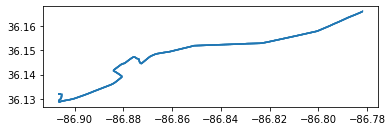

In [21]:
over_in_inschool.plot()

<AxesSubplot:>

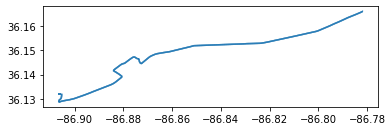

In [22]:
over_in_summer.plot()

Outbound Charts and Graphs
------

Charts
----

In [23]:
main_over_out_inschool = pd.concat([over_out_jantofeb, over_out_febtomar, over_out_martoapr, over_out_aprtomay])
main_over_out_inschool = main_over_out_inschool.reset_index()

main_over_out_inschool

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.90526 36.13135, -86.90525 36.1...",CXODVDSN,Davidson Station Outbound,WALMARTC,Walmart,24.970,3.219242,7.756484,18.066,...,2.419,1.071,335,2.557,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.642994
1,1,"LINESTRING (-86.84755 36.15202, -86.84783 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.150984,11.532396,25.435,...,1.525,1.059,309,1.643,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.593090
2,2,"LINESTRING (-86.87267 36.14453, -86.87286 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,3.806041,6.561937,12.429,...,2.684,2.107,290,2.871,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.556622
3,3,"LINESTRING (-86.79158 36.16174, -86.79182 36.1...",CXONGULC,11th Ave / N Gulch Station Outbound,CXO17AVE,17th Ave Station Outbound,24.726,2.687031,9.201978,23.483,...,1.828,1.546,292,1.996,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.560461
4,4,"LINESTRING (-86.87872 36.14531, -86.87893 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,2.143457,11.651738,4.377,...,1.816,1.312,293,1.900,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.562380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2319,576,"LINESTRING (-86.82778 36.15276, -86.82806 36.1...",CHA33AWF,Charlotte Ave & 33rd Ave Wb,CXOSYLHE,37th Ave/Sylvan Heights Station Outbound,24.596,3.019728,8.145104,32.348,...,1.457,1.144,287,1.577,4/27/22-5/25/22,6am-9am,m-f,inbound,314,0.914013
2320,577,"LINESTRING (-86.88066 36.13905, -86.88084 36.1...",ANNPREEF,Annex Ave & Premier Dr Eb,CXOANNEX,Annex Station Outbound,23.249,5.834653,3.984641,20.841,...,2.653,0.742,303,3.019,4/27/22-5/25/22,6am-9am,m-f,inbound,314,0.964968
2321,578,"LINESTRING (-86.84258 36.15221, -86.84286 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.707826,9.160855,14.375,...,1.879,1.388,293,2.047,4/27/22-5/25/22,6am-9am,m-f,inbound,314,0.933121
2322,579,"LINESTRING (-86.85166 36.15175, -86.85192 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,4.033079,6.150636,33.289,...,1.938,1.579,292,2.091,4/27/22-5/25/22,6am-9am,m-f,inbound,314,0.929936


In [24]:
main_over_out_summer = pd.concat([over_out_maytojun, over_out_juntojul])
main_over_out_summer = main_over_out_summer.reset_index()

main_over_out_summer

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.90526 36.13135, -86.90525 36.1...",CXODVDSN,Davidson Station Outbound,WALMARTC,Walmart,24.970,3.230280,7.729980,5.838,...,2.496,0.801,311,2.618,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.987302
1,1,"LINESTRING (-86.84755 36.15202, -86.84783 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.262589,10.963547,13.802,...,1.600,1.302,292,1.730,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.926984
2,2,"LINESTRING (-86.87267 36.14453, -86.87286 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,4.371814,5.712732,13.058,...,3.007,1.872,295,3.268,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.936508
3,3,"LINESTRING (-86.87872 36.14531, -86.87893 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,2.534186,9.855236,4.998,...,1.929,1.564,295,2.048,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.936508
4,4,"LINESTRING (-86.79158 36.16174, -86.79182 36.1...",CXONGULC,11th Ave / N Gulch Station Outbound,CXO17AVE,17th Ave Station Outbound,24.726,2.935849,8.422095,24.196,...,2.126,1.607,292,2.286,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.926984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,576,"LINESTRING (-86.82778 36.15276, -86.82806 36.1...",CHA33AWF,Charlotte Ave & 33rd Ave Wb,CXOSYLHE,37th Ave/Sylvan Heights Station Outbound,24.596,2.681554,9.172293,32.837,...,1.431,1.215,285,1.533,6/26/22-7/26/22,6am-9am,m-f,inbound,311,0.916399
1157,577,"LINESTRING (-86.88066 36.13905, -86.88084 36.1...",ANNPREEF,Annex Ave & Premier Dr Eb,CXOANNEX,Annex Station Outbound,23.249,5.617645,4.138567,19.528,...,2.568,1.770,299,2.869,6/26/22-7/26/22,6am-9am,m-f,inbound,311,0.961415
1158,578,"LINESTRING (-86.84258 36.15221, -86.84286 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.602163,9.532839,7.774,...,1.793,0.754,289,1.979,6/26/22-7/26/22,6am-9am,m-f,inbound,311,0.929260
1159,579,"LINESTRING (-86.85166 36.15175, -86.85192 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,3.966443,6.253966,52.696,...,1.829,0.981,289,1.974,6/26/22-7/26/22,6am-9am,m-f,inbound,311,0.929260


In [25]:
over_out_inschool = main_over_out_inschool.loc[main_over_out_inschool['proportion_of_segments'] >= 0.5]\

over_out_inschool.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000
mean,290.195841,24.604367,3.105214,10.004657,29.746581,5.156183,3.577139,2.932958,2.334185,2.012736,1.706232,1.205766,277.542461,1.868610,349.000000,0.831737
std,168.245011,0.369256,2.480419,3.412719,60.569278,7.120879,3.663014,2.242238,1.198258,0.726407,0.402392,0.315568,40.761333,0.495655,101.207401,0.149766
min,0.000000,23.249000,1.491860,0.841638,2.280000,1.748000,1.605000,1.535000,1.419000,1.223000,1.057000,0.358000,184.000000,1.163000,261.000000,0.523992
25%,144.000000,24.496000,1.953450,7.668385,5.602000,2.388750,2.106250,1.953500,1.772875,1.635000,1.444000,1.017000,243.750000,1.549750,290.250000,0.788621
50%,290.000000,24.726000,2.295249,10.689176,10.161500,2.974000,2.432000,2.240000,2.005000,1.814000,1.588000,1.207000,288.000000,1.718500,307.000000,0.910000
75%,436.000000,24.932000,3.209888,12.584380,26.688750,4.696250,3.517000,3.035500,2.474625,2.153000,1.837250,1.331000,299.000000,2.004500,365.750000,0.933121
max,580.000000,24.975000,29.126522,16.431837,1121.484000,97.010000,38.985000,29.753000,21.569000,18.598000,3.857000,2.771000,521.000000,7.033000,521.000000,1.000000


In [26]:
over_out_summer = main_over_out_summer.loc[main_over_out_summer['proportion_of_segments'] >= 0.5]\

over_out_summer.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000
mean,289.835355,24.604367,3.195355,9.811352,32.932934,5.256518,3.746949,3.045506,2.384005,2.062026,1.730942,1.219637,293.805893,1.900054,313.000000,0.938698
std,168.107668,0.369336,2.787773,3.378067,84.292254,6.930348,4.092258,2.533713,1.257526,0.946908,0.422600,0.289560,10.183849,0.540636,2.000867,0.032576
min,0.000000,23.249000,1.514381,0.596439,2.687000,1.860000,1.693000,1.547000,1.340000,1.205000,1.056000,0.609000,222.000000,1.167000,311.000000,0.713826
25%,144.000000,24.496000,1.990988,7.500936,5.520000,2.421250,2.148000,2.024750,1.835000,1.676000,1.475000,1.045000,289.000000,1.591250,311.000000,0.923810
50%,289.500000,24.726000,2.320720,10.587534,10.573000,3.059000,2.499500,2.268500,2.028000,1.845000,1.602000,1.194000,292.000000,1.736000,313.000000,0.932476
75%,435.750000,24.932000,3.297617,12.393375,29.018000,4.925500,3.628000,3.087500,2.555750,2.186750,1.857000,1.357000,296.000000,2.018250,315.000000,0.946032
max,580.000000,24.975000,41.865105,16.463492,1942.215000,65.283000,41.856000,30.632000,22.033000,20.021000,3.534000,2.607000,315.000000,7.215000,315.000000,1.000000


Plots
----

<AxesSubplot:>

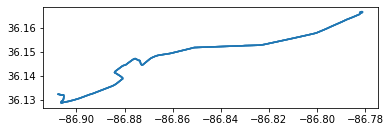

In [27]:
over_out_inschool.plot()

<AxesSubplot:>

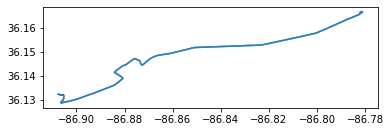

In [28]:
over_out_summer.plot()

Combined Inbound and Outbound Charts and Graphs
---

In [29]:
#all_over_inschool = pd.concat([over_out_jantofeb, over_out_febtomar, over_out_martoapr, over_out_aprtomay, over_in_jantofeb, over_in_febtomar, over_in_martoapr, over_in_aprtomay])
#all_over_inschool = all_over_inschool.reset_index()

#all_over_inschool

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.90526 36.13135, -86.90525 36.1...",CXODVDSN,Davidson Station Outbound,WALMARTC,Walmart,24.970,3.219242,7.756484,18.066,...,2.419,1.071,335,2.557,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.642994
1,1,"LINESTRING (-86.84755 36.15202, -86.84783 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.150984,11.532396,25.435,...,1.525,1.059,309,1.643,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.593090
2,2,"LINESTRING (-86.87267 36.14453, -86.87286 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,3.806041,6.561937,12.429,...,2.684,2.107,290,2.871,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.556622
3,3,"LINESTRING (-86.79158 36.16174, -86.79182 36.1...",CXONGULC,11th Ave / N Gulch Station Outbound,CXO17AVE,17th Ave Station Outbound,24.726,2.687031,9.201978,23.483,...,1.828,1.546,292,1.996,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.560461
4,4,"LINESTRING (-86.87872 36.14531, -86.87893 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,2.143457,11.651738,4.377,...,1.816,1.312,293,1.900,1/25/22-2/24/22,6am-9am,m-f,inbound,521,0.562380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583,561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.415467,10.210034,19.184,...,1.747,1.485,270,1.892,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.954064
4584,562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.959982,12.327154,6.752,...,1.477,1.153,280,1.587,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.989399
4585,563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,11.297746,2.148216,258.473,...,1.841,1.484,268,2.037,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.946996
4586,564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,4.723743,5.031180,66.682,...,2.494,1.717,269,2.917,4/27/22-5/25/22,6am-9am,m-f,inbound,283,0.950530


In [30]:
#all_over_summer = pd.concat([over_out_maytojun, over_out_juntojul, over_in_maytojun, over_in_juntojul])
#all_over_summer = all_over_summer.reset_index()

#all_over_summer

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,times,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.90526 36.13135, -86.90525 36.1...",CXODVDSN,Davidson Station Outbound,WALMARTC,Walmart,24.970,3.230280,7.729980,5.838,...,2.496,0.801,311,2.618,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.987302
1,1,"LINESTRING (-86.84755 36.15202, -86.84783 36.1...",CXORICHL,46th Ave/Richland Park Station Outbound,CXO53AVE,53rd Ave Station Outbound,24.806,2.262589,10.963547,13.802,...,1.600,1.302,292,1.730,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.926984
2,2,"LINESTRING (-86.87267 36.14453, -86.87286 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,4.371814,5.712732,13.058,...,3.007,1.872,295,3.268,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.936508
3,3,"LINESTRING (-86.87872 36.14531, -86.87893 36.1...",CXOAMERI,American Station Outbound,PREWILSF,Premier Dr & Wilclay Dr Sb,24.975,2.534186,9.855236,4.998,...,1.929,1.564,295,2.048,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.936508
4,4,"LINESTRING (-86.79158 36.16174, -86.79182 36.1...",CXONGULC,11th Ave / N Gulch Station Outbound,CXO17AVE,17th Ave Station Outbound,24.726,2.935849,8.422095,24.196,...,2.126,1.607,292,2.286,5/26/22-6/25/22,6am-9am,m-f,inbound,315,0.926984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,561,"LINESTRING (-86.87143 36.14546, -86.87124 36.1...",CXIAMERI,American Station Inbound,CHABALEF,Charlotte Ave & Balmy Ave Eb,24.662,2.429097,10.152744,12.789,...,1.768,1.433,269,1.858,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.953901
2289,562,"LINESTRING (-86.80505 36.15676, -86.80479 36.1...",CXICENTE,23rd Ave / Centennial Station Inbound,CHA20AEF,Charlotte Ave & 20th Ave Eb,24.161,1.915051,12.616374,5.269,...,1.485,1.075,277,1.616,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.982270
2290,563,"LINESTRING (-86.85058 36.15184, -86.85031 36.1...",CXI53AVE,53rd Ave Station Inbound,CXIRICHL,46th Ave/Richland Park Station Inbound,24.270,8.154800,2.976161,82.527,...,1.838,0.825,270,2.019,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.957447
2291,564,"LINESTRING (-86.83597 36.15238, -86.83570 36.1...",CXISYLPA,42nd Ave/Sylvan Park Station Inbound,CHA39AEF,Charlotte Ave & 39th Ave N Eb,23.766,4.754278,4.998866,61.330,...,2.385,1.480,273,2.833,6/26/22-7/26/22,6am-9am,m-f,inbound,282,0.968085


Charts
----

In [31]:
#comboall_over_inschool = all_over_inschool.loc[all_over_inschool['proportion_of_segments'] >= 0.5]\

#comboall_over_inschool.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,4568.000000,4568.000000,4568.000000,4568.000000,4568.000000,4568.000000,4568.00000,4568.000000,4568.000000,4568.000000,4568.000000,4568.000000,4568.000000,4568.000000,4568.000000,4568.000000
mean,286.390543,24.529295,3.159792,9.945620,27.695930,5.316854,3.73187,3.047360,2.366907,2.022411,1.722405,1.226035,258.861646,1.881097,304.720228,0.877037
std,165.975207,0.379192,2.920552,3.392748,61.752074,7.876172,4.73743,3.270379,1.415093,0.703750,0.426675,0.336910,41.629084,0.517348,87.641816,0.120132
min,0.000000,23.249000,1.491860,0.520539,2.280000,1.748000,1.60500,1.535000,1.419000,1.223000,1.057000,0.358000,140.000000,1.163000,205.000000,0.523992
25%,142.000000,24.348000,1.955415,7.611029,5.126750,2.416000,2.13000,1.979000,1.786000,1.639000,1.443750,1.036000,233.000000,1.555000,267.000000,0.861210
50%,286.500000,24.610000,2.315862,10.561834,8.937000,3.062000,2.49850,2.282000,2.024500,1.832000,1.598000,1.219000,266.000000,1.730000,283.000000,0.921708
75%,430.000000,24.806000,3.219622,12.515017,23.738250,4.792000,3.57450,3.037750,2.474625,2.165000,1.852250,1.358000,289.000000,2.023000,314.000000,0.946996
max,580.000000,24.975000,47.765885,16.431837,1397.331000,115.266000,81.73000,66.873000,31.526500,18.598000,5.021000,3.078000,521.000000,7.033000,521.000000,1.000000


In [32]:
#comball_over_summer = all_over_summer.loc[all_over_summer['proportion_of_segments'] >= 0.5]\

#comboall_over_summer.describe()

NameError: name 'comboall_over_summer' is not defined

In [ ]:
#combo_over_inschool = all_over_inschool.loc[all_over_inschool['percent20Secs'] > np.quantile(all_over_inschool['percent20Secs'], .80)]
#combo_over_inschool

In [ ]:
#combo_over_summer = all_over_summer.loc[all_over_summer['percent20Secs'] > np.quantile(all_over_summer['percent20Secs'], .80)]
#combo_over_summer

Plots
---

In [ ]:
#comboall_over_inschool.plot()

In [ ]:
#comboall_over_summer.plot()

In [ ]:
#combo_over_inschool.plot()

In [ ]:
#combo_over_summer.plot()